# Simple Random Forest Analysis
* Data: [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult) from UCI Machine Learning Repository
* Link: [Adult data](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/)

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

%matplotlib inline

print('Scikit-learn:\t', sklearn.__version__)
print('Numpy:\t\t', np.__version__)
print('Pandas:\t\t', pd.__version__)
print('Matplotlib:\t', mpl.__version__)

Scikit-learn:	 0.19.0
Numpy:		 1.13.1
Pandas:		 0.20.3
Matplotlib:	 2.0.2


## Read Data

In [2]:
names = ['age', 'workclass', 'fnlwget', 'education', 'education-num', 'marital-status', 'occupation', 
         'relation', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'target']
train = pd.read_csv('./data/Adult/adult.data', header=None, names=names, na_values=' ?')
test = pd.read_csv('./data/Adult/adult.test', header=None, names=names, skiprows=1, na_values=' ?')

In [3]:
train.head()

,age,workclass,fnlwget,education,education-num,marital-status,occupation,relation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
test.head()

,age,workclass,fnlwget,education,education-num,marital-status,occupation,relation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


## Exploratory Data Analysis

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwget           32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        30718 non-null object
relation          32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    31978 non-null object
target            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         15318 non-null object
fnlwget           16281 non-null int64
education         16281 non-null object
education-num     16281 non-null int64
marital-status    16281 non-null object
occupation        15315 non-null object
relation          16281 non-null object
race              16281 non-null object
sex               16281 non-null object
capital-gain      16281 non-null int64
capital-loss      16281 non-null int64
hours-per-week    16281 non-null int64
native-country    16007 non-null object
target            16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [7]:
train.describe()

,age,fnlwget,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
test.describe()

,age,fnlwget,education-num,capital-gain,capital-loss,hours-per-week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [9]:
# missing values
train.isnull().sum()

age                  0
workclass         1836
fnlwget              0
education            0
education-num        0
marital-status       0
occupation        1843
relation             0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
target               0
dtype: int64

In [10]:
test.isnull().sum()

age                 0
workclass         963
fnlwget             0
education           0
education-num       0
marital-status      0
occupation        966
relation            0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
target              0
dtype: int64

In [11]:
# imbalanced class problem
print(train[['sex', 'target']].groupby('target').count() / len(train))
print(test[['sex', 'target']].groupby('target').count() / len(test))

            sex
target         
 <=50K  0.75919
 >50K   0.24081
              sex
target           
 <=50K.  0.763774
 >50K.   0.236226


### Note:
1. The train data set has 32,561 rows and 15 columns.
2. The test data has 16,281 rows and 15 columns.
3. Variable target is the dependent variable.
4. The target variable in train and test data is different. We'll need to match them.
5. All character variables have a leading whitespace which can be removed.
6. There are missing values in both train and test set
7. Target is imblanced

## Feature Engineering

In [12]:
# fill missing value with median or mode
train.loc[train['workclass'].isnull(), 'workclass'] = train['workclass'].mode()[0]
test.loc[test['workclass'].isnull(), 'workclass'] = test['workclass'].mode()[0]

train.loc[train['occupation'].isnull(), 'occupation'] = train['occupation'].mode()[0]
test.loc[test['occupation'].isnull(), 'occupation'] = test['occupation'].mode()[0]

train.loc[train['native-country'].isnull(), 'native-country'] = train['native-country'].mode()[0]
test.loc[test['native-country'].isnull(), 'native-country'] = test['native-country'].mode()[0]

In [13]:
# categorical and numerical features
cat_feature = ['workclass', 'education', 'marital-status', 'occupation', 'relation', 'race', 'sex', 'native-country']
num_feature = ['age', 'fnlwget', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [14]:
# trim the space for categorical features
for name in cat_feature + ['target']:
    train[name] = train[name].apply(lambda x: x.strip())
    test[name] = test[name].apply(lambda x: x.strip())

In [15]:
# unique feature number
for name in cat_feature:
    print(name, '\t', 'train:\t', len(train[name].unique()), '\ttest:\t', len(test[name].unique()))

workclass 	 train:	 8 	test:	 8
education 	 train:	 16 	test:	 16
marital-status 	 train:	 7 	test:	 7
occupation 	 train:	 14 	test:	 14
relation 	 train:	 6 	test:	 6
race 	 train:	 5 	test:	 5
sex 	 train:	 2 	test:	 2
native-country 	 train:	 41 	test:	 40


In [16]:
for name in cat_feature:
    print(name, '\t', list(sorted(train[name].unique())) == list(sorted(test[name].unique())))

workclass 	 True
education 	 True
marital-status 	 True
occupation 	 True
relation 	 True
race 	 True
sex 	 True
native-country 	 False


In [17]:
# transform target values
print('train:\t', train['target'].unique())
print('test:\t', test['target'].unique())

# transform into binary
train['target'] = train['target'].apply(lambda x: 0 if x == '<=50K' else 1)
test['target'] = test['target'].apply(lambda x: 0 if x == '<=50K.' else 1)

train:	 ['<=50K' '>50K']
test:	 ['<=50K.' '>50K.']


In [18]:
# transform sex values
print('train:\t', train['sex'].unique())
print('test:\t', test['sex'].unique())

# transform into binary
train['sex'] = train['sex'].apply(lambda x: 0 if x == 'Male' else 1)
test['sex'] = test['sex'].apply(lambda x: 0 if x == 'Male' else 1)

train:	 ['Male' 'Female']
test:	 ['Male' 'Female']


In [19]:
train.head()

,age,workclass,fnlwget,education,education-num,marital-status,occupation,relation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,Cuba,0


In [20]:
pd.crosstab(train['workclass'], train['target'])

target,0,1
workclass,,
Federal-gov,589,371
Local-gov,1476,617
Never-worked,7,0
Private,19378,5154
Self-emp-inc,494,622
Self-emp-not-inc,1817,724
State-gov,945,353
Without-pay,14,0


In [21]:
pd.crosstab(train['education'], train['target'])

target,0,1
education,,
10th,871,62
11th,1115,60
12th,400,33
1st-4th,162,6
5th-6th,317,16
7th-8th,606,40
9th,487,27
Assoc-acdm,802,265
Assoc-voc,1021,361


In [22]:
pd.crosstab(train['marital-status'], train['target'])

target,0,1
marital-status,,
Divorced,3980,463
Married-AF-spouse,13,10
Married-civ-spouse,8284,6692
Married-spouse-absent,384,34
Never-married,10192,491
Separated,959,66
Widowed,908,85


In [23]:
pd.crosstab(train['occupation'], train['target'])

target,0,1
occupation,,
Adm-clerical,3263,507
Armed-Forces,8,1
Craft-repair,3170,929
Exec-managerial,2098,1968
Farming-fishing,879,115
Handlers-cleaners,1284,86
Machine-op-inspct,1752,250
Other-service,3158,137
Priv-house-serv,148,1


In [24]:
pd.crosstab(train['relation'], train['target'])

target,0,1
relation,,
Husband,7275,5918
Not-in-family,7449,856
Other-relative,944,37
Own-child,5001,67
Unmarried,3228,218
Wife,823,745


In [25]:
pd.crosstab(train['race'], train['target'])

target,0,1
race,,
Amer-Indian-Eskimo,275,36
Asian-Pac-Islander,763,276
Black,2737,387
Other,246,25
White,20699,7117


In [26]:
pd.crosstab(train['native-country'], train['target'])

target,0,1
native-country,,
Cambodia,12,7
Canada,82,39
China,55,20
Columbia,57,2
Cuba,70,25
Dominican-Republic,68,2
Ecuador,24,4
El-Salvador,97,9
England,60,30


In [27]:
# merget data together for better processing
data = pd.concat([train, test])
data.head()

,age,workclass,fnlwget,education,education-num,marital-status,occupation,relation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,Cuba,0


In [28]:
# categorical and numerical features
cat_feature = ['workclass', 'education', 'marital-status', 'occupation', 'relation', 'race', 'native-country']
num_feature = ['age', 'fnlwget', 'education-num', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week']

# One-hot encoding categorical features
tmp = pd.get_dummies(data[cat_feature])
dummy_data = pd.concat([data[num_feature], tmp], axis=1)
dummy_data.shape

(48842, 104)

In [29]:
dummy_data.head()

,age,fnlwget,education-num,sex,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,0,2174,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,0,13,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# get encoded train and test data
train_x = dummy_data[:len(train)]
test_x = dummy_data[len(train):]
train_y = data[:len(train)]['target'].values
test_y = data[len(train):]['target'].values

## Fit Models

In [32]:
# build the random forest model
oob_score = []
train_auc = []
test_auc = []
min_estimators = 30
n_estimators = 400
model = RandomForestClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                               min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, 
                               min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, 
                               oob_score=True, n_jobs=-1, random_state=None, verbose=0, 
                               warm_start=True, class_weight=None)

# fit the model and calculate errors
for i in range(min_estimators, n_estimators + 1):
    model.set_params(n_estimators=i)
    model.fit(train_x, train_y)
    train_pred = model.predict_proba(train_x)[:, 1]
    test_pred = model.predict_proba(test_x)[:, 1]
    # calculate AUC
    train_auc.append(roc_auc_score(train_y, train_pred))
    test_auc.append(roc_auc_score(test_y, test_pred))
    oob_score.append(model.oob_score_)

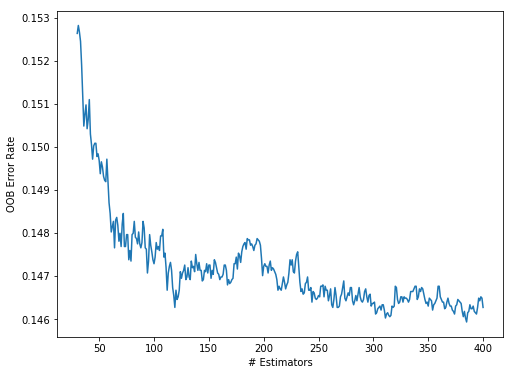

In [33]:
# OOB Error curve
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(range(min_estimators, n_estimators + 1), 1 - np.array(oob_score))
ax.set_xlabel('# Estimators')
ax.set_ylabel('OOB Error Rate')

plt.show()

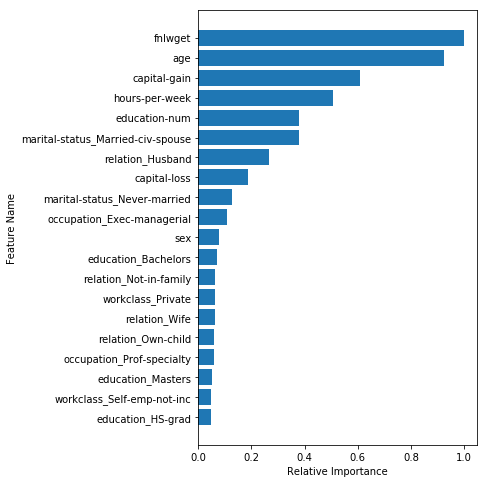

In [34]:
# feature importance
features = train_x.columns.values
importance = model.feature_importances_ / np.max(model.feature_importances_)
idx = np.argsort(importance)

n = 20
pos = np.arange(n) + 0.5
fig, ax = plt.subplots(figsize=(5, 8))
ax.barh(pos, importance[idx[-n:]], align='center')
plt.yticks(pos, features[idx[-n:]])
ax.set_xlabel('Relative Importance')
ax.set_ylabel('Feature Name')

plt.show()

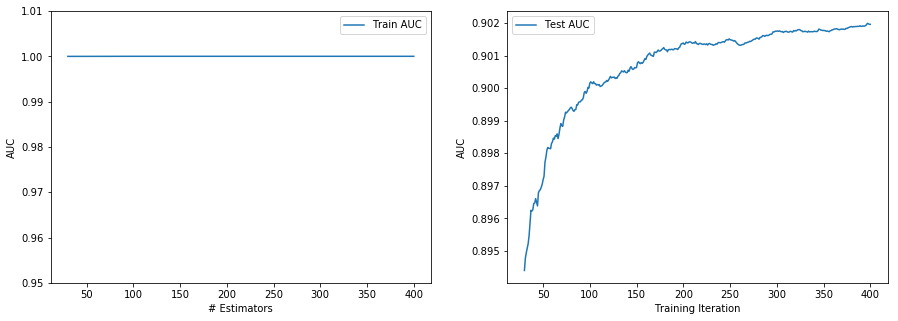

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].plot(range(min_estimators, n_estimators + 1), train_auc, label='Train AUC')
ax[0].set_ylim([0.95, 1.01])
ax[0].set_xlabel('# Estimators')
ax[0].set_ylabel('AUC')
ax[0].legend()

ax[1].plot(range(min_estimators, n_estimators + 1), test_auc, label='Test AUC')
ax[1].set_xlabel('Training Iteration')
ax[1].set_ylabel('AUC')
ax[1].legend()
plt.show()